# 90 sets models
In this notebook we are creating models for using on the data that are a concatenation of 90 sets in total and the individuals parameters

In [12]:
from helpers import print_mean_squared_error, print_coefficient_of_determination

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

L = []

for i in range(65):
    L.append(f"rep{i}")
    L.append(f"weight{i}")

L2 = ["age", "person_weight", "gender", "pre-performance", "performance"]
L += L2

# Read the CSV file.
data = pd.read_csv("./data/regression_dataframe_medium.csv", names=L)

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

Y = data_shuffled['performance']
Y.head()

# Split into input part X and output part Y.
X = data_shuffled.drop('performance', axis=1)

# # Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)


c:\users\razan\modell\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
X.head()

,rep0,weight0,rep1,weight1,rep2,weight2,rep3,weight3,rep4,weight4,...,rep62,weight62,rep63,weight63,rep64,weight64,age,person_weight,gender,pre-performance
2373,10.0,46.5,10.0,55.8,8.0,65.1,6.0,60.45,6.0,69.75,...,3.0,79.05,2.0,83.7,2.0,83.7,26.0,0.0,55.57853892517826,93.0
2755,10.0,42.5,10.0,51.0,8.0,59.5,6.0,55.25,6.0,63.75,...,3.0,72.25,2.0,76.5,2.0,76.5,31.0,1.0,50.68928308664215,85.0
2265,10.0,47.5,10.0,57.0,8.0,66.5,6.0,61.75,6.0,71.25,...,3.0,80.75,2.0,85.5,2.0,85.5,31.0,1.0,49.02534399749954,95.0
3901,10.0,52.0,10.0,62.4,8.0,72.8,6.0,67.6,6.0,78.0,...,3.0,88.4,2.0,93.6,2.0,93.6,30.0,0.0,54.18361502419756,104.0
3175,10.0,52.5,10.0,63.0,8.0,73.5,6.0,68.25,6.0,78.75,...,3.0,89.25,2.0,94.5,2.0,94.5,31.0,0.0,44.668000789458844,105.0


In [5]:
# plotting the data using PCA
from visualizers import data_plotter
data_plotter.Reducer_plotter.pca_plot(Xtrain)

ValueError: could not convert string to float: 'rep0'


# Basic linear regression

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Träna modellen
lr = LinearRegression()
lr.fit(Xtrain,Ytrain)

#Använd på testsettet
Ypred = lr.predict(Xtest)

lr_mean_squared_error = mean_squared_error(Ytest, Ypred)
lr_r2_score = r2_score(Ytest, Ypred)

print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)



Mean squared error: 0.40
Coefficient of determination: 0.99


## Ridge regression

In [12]:
#Ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(Xtrain, Ytrain)
# Ridge()
ridge_Ypred = ridge.predict(Xtest)

ridge_mean_squared_error = mean_squared_error(Ytest, ridge_Ypred)
ridge_r2_score = r2_score(Ytest, ridge_Ypred)

print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)


Mean squared error: 0.38
Coefficient of determination: 0.99


## Lasso regression

In [13]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(Xtrain,Ytrain)
lasso_Ypred = lasso.predict(Xtest)

lasso_mean_squared_error = mean_squared_error(Ytest, lasso_Ypred)
lasso_r2_score = r2_score(Ytest, lasso_Ypred)

print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)


Mean squared error: 0.63
Coefficient of determination: 0.99





## Summaries of the result & Plotting Learning Curves

Normal linear regression:
Mean squared error: 0.40
Coefficient of determination: 0.99


Lasso regression:
Mean squared error: 0.63
Coefficient of determination: 0.99


Ridge regression:
Mean squared error: 0.38
Coefficient of determination: 0.99




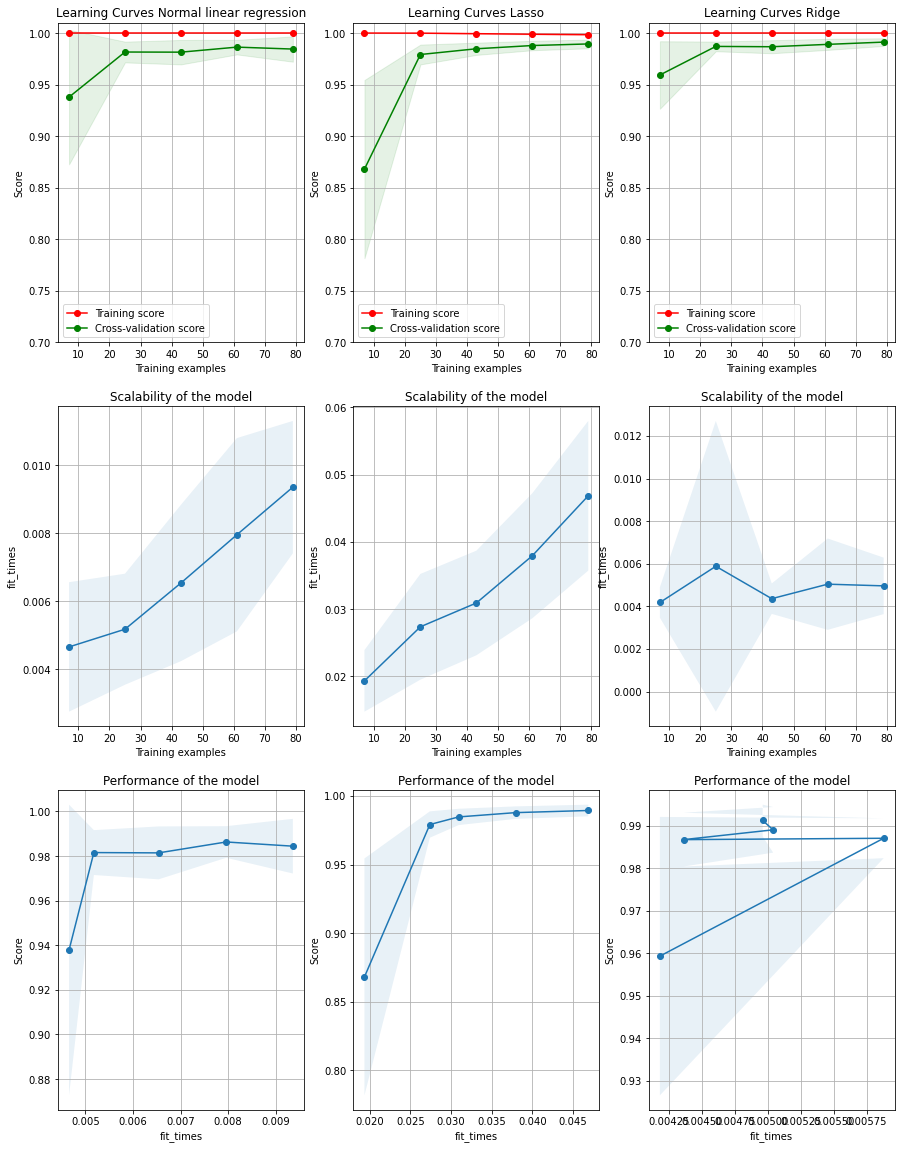

In [107]:
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from visualizers.model_learning_curve_plotter import Learning_curve_plotter

fig, axes = plt.subplots(3, 3, figsize=(15, 20))


title = "Learning Curves Normal linear regression"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = LinearRegression()
Learning_curve_plotter(estimator, title, X, Y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
print("Normal linear regression:")
print_mean_squared_error(lr_mean_squared_error)
print_coefficient_of_determination(lr_r2_score)
print("\n")


title = "Learning Curves Lasso"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = linear_model.Lasso(alpha=0.1)
Learning_curve_plotter(estimator, title, X, Y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
print("Lasso regression:")
print_mean_squared_error(lasso_mean_squared_error)
print_coefficient_of_determination(lasso_r2_score)
print("\n")



title = "Learning Curves Ridge"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = Ridge(alpha=1.0)
Learning_curve_plotter(estimator, title, X, Y, axes=axes[:, 2], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
print("Ridge regression:")
print_mean_squared_error(ridge_mean_squared_error)
print_coefficient_of_determination(ridge_r2_score)
print("\n")


